In [17]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [152]:
class kmeans:
    def __init__(self, k, diffC_lim=0.1):
        self.k = k
        self.diffC_lim = diffC_lim
        self.centers = []
        
    def classify_X(self, X):
        distances = []
        for c in self.centers:
            d = np.sqrt(np.sum(np.square((X-c)), axis=1))
            distances.append(d)
        distances = np.array(distances)
        labels = np.argmin(distances, axis=0)
        return labels
    
    def update_centers(self, X, labels):
        new_centers = np.zeros(self.centers.shape)
        for i in range(self.k):
            c = np.mean(X[labels==i, :], axis=0)
            if np.isnan(np.sum(c)):
                new_centers[i, :] = self.centers[i, :]
            else:
                new_centers[i, :] = c
        return new_centers
        
        
    def train(self, X):
        # init centers by random numbers
        m = np.min(X)
        M = np.max(X)
        # Forgy method
        idx = np.random.choice(np.arange(len(X)), self.k, replace=False)
        self.centers = X[idx, :]

        while True:
            labels = self.classify_X(X)
            new_centers = self.update_centers(X, labels)
            diffC = np.sqrt(np.sum(np.square((new_centers-self.centers)), axis=1))
            print('Center shift:', diffC)
            for i in range(self.k):
                plt.subplot(int(self.k/5)+1, 5, i+1)
                plt.imshow(np.reshape(self.centers[i, :], (28, 28)))
            plt.show()
            
            if np.sum(diffC) < self.diffC_lim: # if the preset limit is reached, end the iterations
                print('Iteration terminated.')
                break
            else:
                self.centers = new_centers # otherwise update centers
    
    def get_centers(self):
        return self.centers

## MNIST data

In [14]:
data_filename = 'data/mnist_data/images.mat'
data = scipy.io.loadmat(data_filename)
data = data['images']

Center shift: [ 1365.27414033     0.          1350.63534903  1978.169605       0.        ]


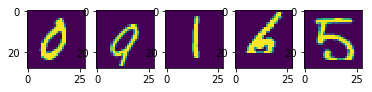

Center shift: [  474.46681463  1124.19437184   254.45611227   297.52165402  1424.42480167]


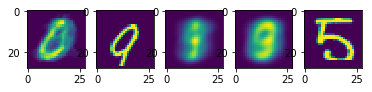

Center shift: [ 135.94344216  545.25215981   84.71827132  148.07478042  723.91174   ]


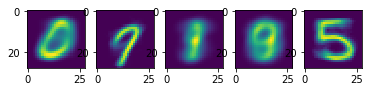

Center shift: [  47.94482403  215.59136156   63.47303504  143.16264518  330.9651806 ]


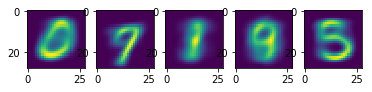

Center shift: [  46.6853752   108.66890019   44.91282989  101.36443424  174.29685706]


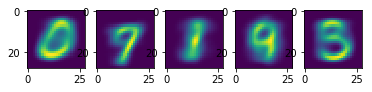

Center shift: [  39.27321282   69.22273212   31.68401008   76.38082897  116.67193593]


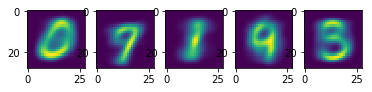

Center shift: [ 35.94085277  51.62693473  26.1647668   55.6484258   83.39401745]


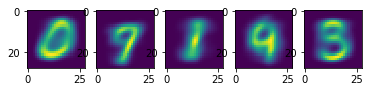

Center shift: [ 39.18341657  36.60541633  22.93126237  30.62232936  61.57216282]


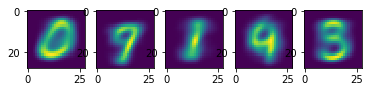

Center shift: [ 45.66921261  25.19640488  20.42242343  17.12337594  53.56344666]


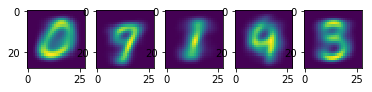

Center shift: [ 51.14680325  16.00590372  14.56722213  12.06560868  46.21983968]


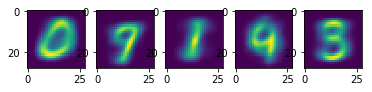

Center shift: [ 53.06217134   9.2457544   10.01715634  13.10686062  39.85530159]


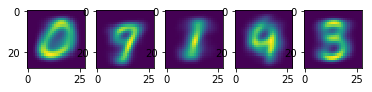

Center shift: [ 53.25451504   6.99323119   7.65253752  18.3761925   33.14391594]


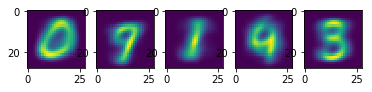

Center shift: [ 49.07660408   5.8668844    6.17424617  22.11901432  25.64108669]


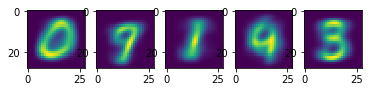

Center shift: [ 49.65145641   6.48669705   6.07625351  28.20692088  19.17016103]


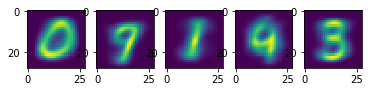

Center shift: [ 48.75863918  11.58014732   7.2090406   33.7749059   13.80434423]


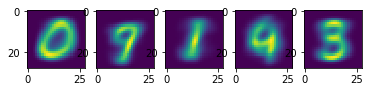

Center shift: [ 46.86750987  14.17497035   8.80527117  36.47568667  11.35252371]


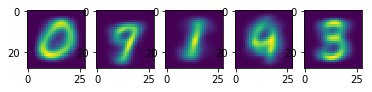

Center shift: [ 45.73368779  17.56196934   9.18981496  37.69557705   9.50280961]


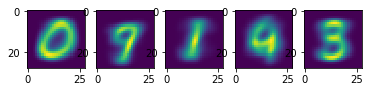

Center shift: [ 41.70496408  21.59643339   9.32329267  39.56653901   8.80645712]


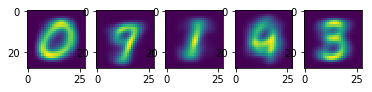

Center shift: [ 38.18058872  26.02202142   9.10408756  42.44808616   7.34869175]


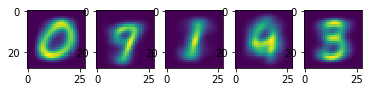

Center shift: [ 33.03314784  28.45607699   8.37822214  43.05189941   5.09542919]


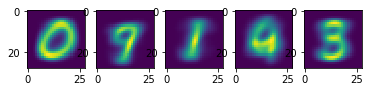

Center shift: [ 28.70739981  31.52540858   8.10221742  45.46663865   5.16209032]


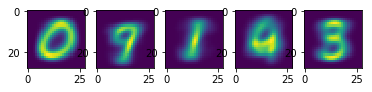

Center shift: [ 24.45477351  33.49351137   8.41574262  47.31172322   4.23618422]


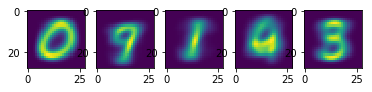

Center shift: [ 19.72579871  32.72105936   8.60735703  46.72587918   5.04391547]


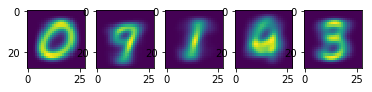

Center shift: [ 14.15636474  34.09729698   8.48532382  46.93408651   4.69608583]


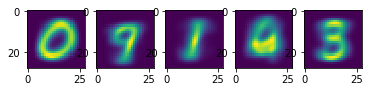

Center shift: [ 13.33071431  34.10375692   7.71447193  47.98343303   5.32189784]


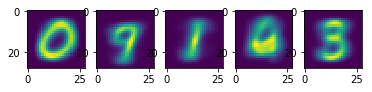

Center shift: [ 12.54289546  34.39988139   8.32463152  47.22631144   6.86261448]


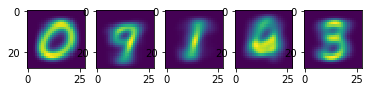

Center shift: [  9.13898862  27.68854312   8.23487042  36.23400616   6.91569602]


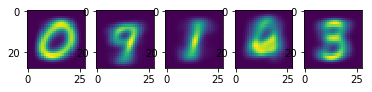

Center shift: [  7.67650058  24.71479869   7.97918966  34.47167101   5.72659304]


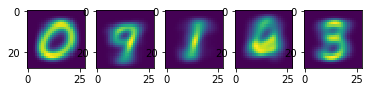

Center shift: [  6.06017126  22.70785249   8.57562486  32.12193274   5.05453218]


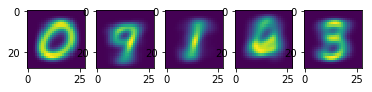

Center shift: [  3.42593989  17.59100544   7.90541902  26.49765997   6.3421755 ]


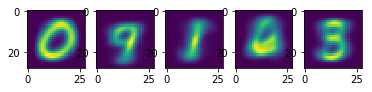

Center shift: [  3.36662458  12.72802133   6.61963598  20.5194706    5.71700601]


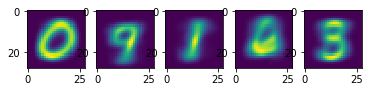

Iteration terminated.
Wall time: 1min 27s


In [153]:
%%time
k = 5
km = kmeans(k, diffC_lim=50)
km.train(X)

# for i in range(k):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(np.reshape(km.centers[i, :], (28, 28)))
# plt.show()

Center shift: [ 1531.43451425  1534.75203043  1663.12383764  1699.56250222  1524.16096491
  1463.89394779  1585.64395798  1388.59070246  1540.71274948  1363.92971187]


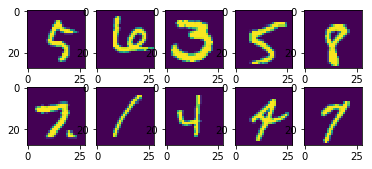

Center shift: [ 346.77651495  383.98312961  577.73554459  313.54070148  361.6841256
  319.12637506  349.77854733  449.94009106  363.66867016  453.94586529]


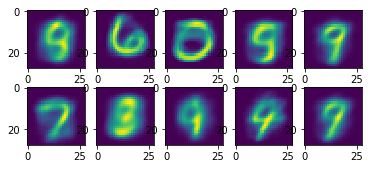

Center shift: [ 117.90387655  131.13313602  229.4475829   227.57201917  129.70772375
  191.71827469  122.70909504  248.09532426  229.47908607  179.94360102]


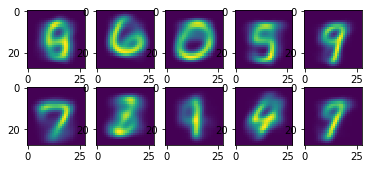

Center shift: [  85.81678431   84.50109213  109.19983556  175.72013516  105.67101371
  119.59309253   83.75987068  146.16120467  160.92557358   99.63095702]


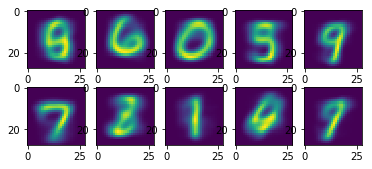

Center shift: [ 150.77728663   78.17321224   49.15942207  152.65118226   76.19711197
   68.57058151   75.17847344   84.86464481  113.92255409   60.30111266]


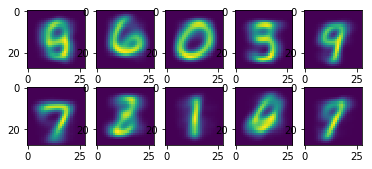

Center shift: [ 235.94961207   93.15671643   27.97684686  123.98096529   42.29422406
   45.20738121   67.66836488   53.03535047   79.23538403   45.42578098]


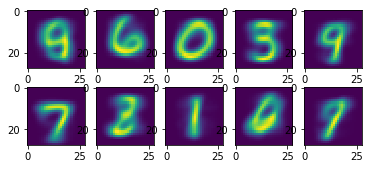

Center shift: [ 228.94005933   88.84199084   21.34868066   87.69905771   31.28003628
   53.37945742   55.78945825   40.37117105   50.69432084   39.3160256 ]


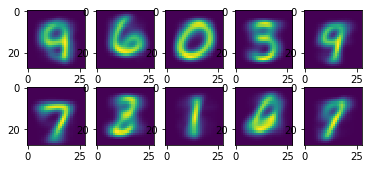

Center shift: [ 99.21564864  59.09453679  17.67422639  39.95700413  33.14042913
  49.34714816  54.15829473  31.4308063   33.8953257   31.71079681]


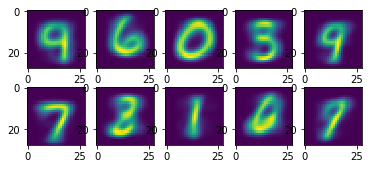

Center shift: [ 42.89495014  45.19687412  11.38622863  18.34005579  24.07655945
  41.26038656  47.11710232  22.91383346  31.45201937  25.99279992]


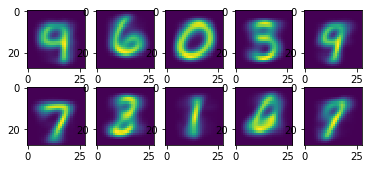

Center shift: [ 29.63226583  38.84799965   6.24821726  11.44483662  15.49064155
  33.41528562  43.06689017  17.88407608  29.73840875  23.55893224]


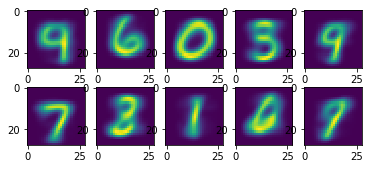

Center shift: [ 18.16151077  28.89695093   4.80695604   7.19091936  12.80183888
  26.23654803  38.22349389  13.28495118  26.15533299  22.29140384]


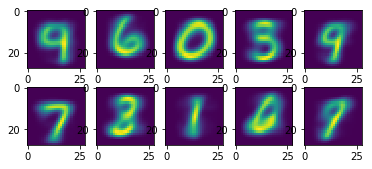

Center shift: [ 14.96794558  25.58722873   4.7796133    5.03968392   9.86836531
  19.60072874  34.75047791   8.74841453  23.10550458  21.05245809]


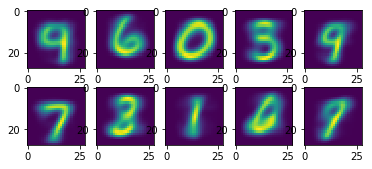

Center shift: [ 13.66071775  20.63377785   4.65599172   3.77008042   7.27518962
  18.2797873   28.25022419   4.77733815  21.13662418  18.09979187]


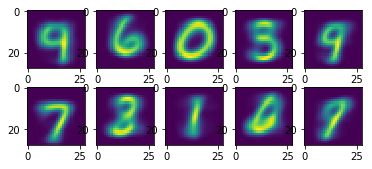

Center shift: [  9.26959327  18.41767944   4.78559522   2.90600265   6.10574951
  15.03000981  25.35091138   2.23474818  20.45110694  16.77933217]


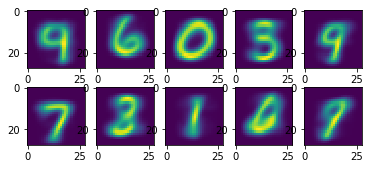

Center shift: [  6.0613628   15.40529894   3.99748434   3.1345544    5.09882788
  11.5537861   24.82341273   1.97826875  17.89876906  16.12361125]


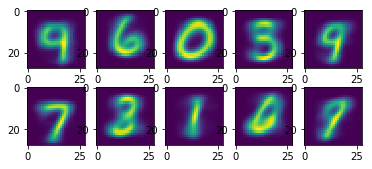

Center shift: [  5.41714015  13.55947248   4.46850017   4.45249808   5.23532845
   8.93136316  23.16916883   1.83534579  16.63810408  14.91762937]


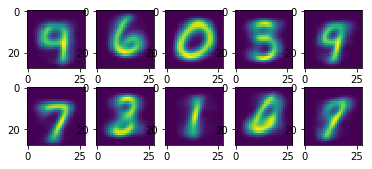

Center shift: [  3.53088446  11.03551718   3.10409722   5.38147866   4.91390419
   7.39002427  25.64331369   2.81544844  17.28568426  15.44114032]


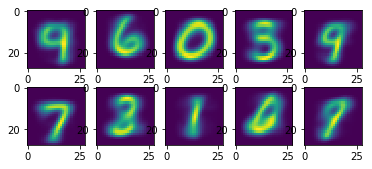

Center shift: [  3.20628035  10.3632425    3.83861457   6.65069735   7.16465575
   6.36922321  29.47109438   2.79931319  20.98089011  17.15981444]


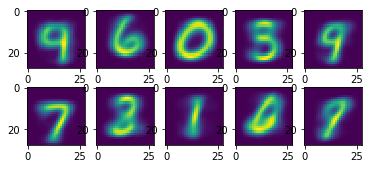

Center shift: [  4.65558651   9.43218118   5.17904202   8.18316714   7.49151271
   7.89091234  32.67110329   2.83517324  22.44599003  17.52110126]


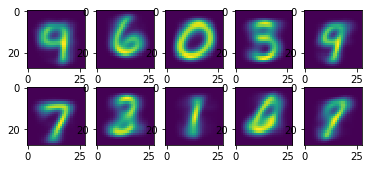

Center shift: [  2.96623352   8.25573361   5.12983683  10.35035571   9.08651326
   7.92510509  38.45058878   2.79387704  24.55549294  19.12174348]


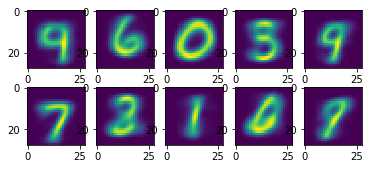

Center shift: [  3.51547286   7.51332355   4.78218127  11.66782611   8.40646211
   8.42373583  43.76228238   2.95532841  27.06911073  20.4819421 ]


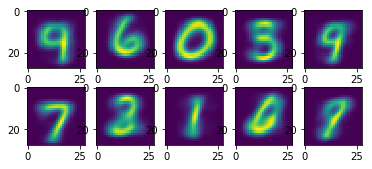

Center shift: [  2.7518452    5.33385155   5.92986756  13.52325828  11.59851001
  10.53205098  45.56684932   3.90426924  32.65443255  20.82062231]


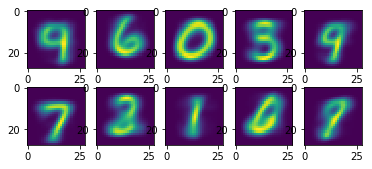

Center shift: [  3.84024515   5.15172143   6.14752059  13.75158412  10.39204203
   9.02464429  47.51460412   4.50515591  37.93530237  18.12156347]


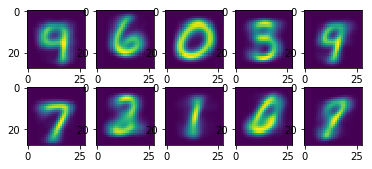

Center shift: [  4.35305608   5.03621606   7.70248173  17.33902603  10.88400017
   5.79821857  51.92142582   3.12765269  39.22592664  15.4098561 ]


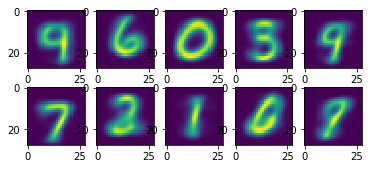

Center shift: [  4.45954487   4.47560253   8.9391776   18.32372038   9.05170388
   5.26175164  52.62940606   4.10951626  34.7847099   16.25205878]


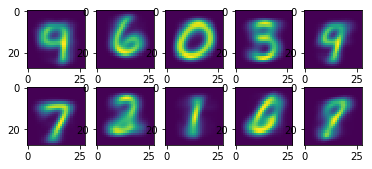

Center shift: [  4.90737098   3.55530176   8.92619302  18.40779915   8.56033294
   6.17190002  53.57314538   4.75459637  39.23812669  17.04989812]


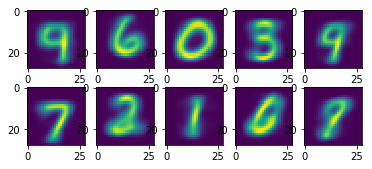

Center shift: [  4.97960977   4.7598868    6.37806433  17.98973269   7.05613381
   5.56783429  57.43832576   5.16904875  37.1293975   15.62452458]


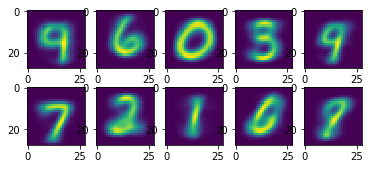

Center shift: [  3.6927554    4.88195936   5.50009713  14.91470811   6.17371366
   4.80746718  54.12384723   4.6817521   35.71715721  14.71545432]


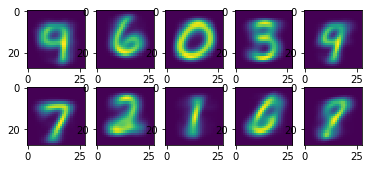

Center shift: [  3.6746602    3.48397515   3.42719832  11.98749999   5.27137001
   4.50141975  48.07911886   5.23018563  33.47140187  16.1941048 ]


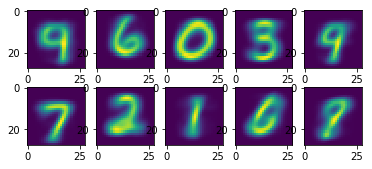

Center shift: [  4.17339401   3.83982005   3.29017658   9.52527408   4.81939001
   5.84330748  40.3897579    6.20856132  27.62380136  14.69407319]


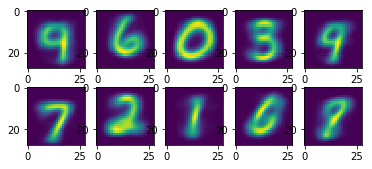

Center shift: [  4.4623467    3.1163861    3.69035815   8.12112893   5.41104358
   5.01749463  36.57214675   5.54776991  27.01201519  12.76716565]


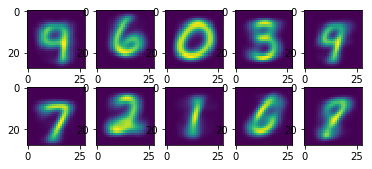

Center shift: [  3.82996739   3.10719832   2.46689505   7.02711234   4.92254913
   4.52835384  27.83839948   5.09188784  20.71917487  12.88490826]


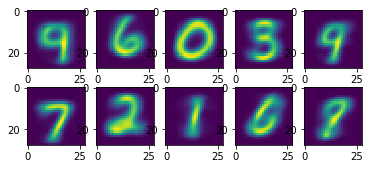

Center shift: [  3.99761611   4.51128775   2.92458603   4.41714808   4.29752708
   4.69164701  17.94494885   4.09011918  16.76324477   9.67578179]


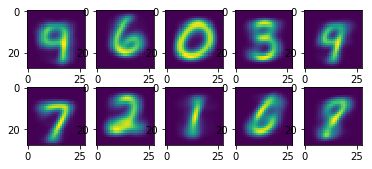

Center shift: [  3.96048875   4.85537925   1.71239409   3.72628282   4.77586364
   3.06167736  14.55395737   3.60593643  13.85168114   9.3600086 ]


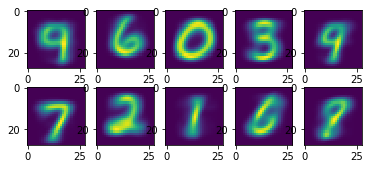

Center shift: [  3.72092224   3.50756912   1.31191071   3.97811998   6.25478784
   3.69212035  10.8595231    2.83032199  11.91801057   9.2304178 ]


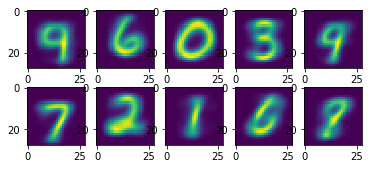

Center shift: [ 3.27795413  3.36074956  1.2782541   3.35879943  6.56971581  2.16606255
  6.777601    3.84162128  9.61567585  9.64983694]


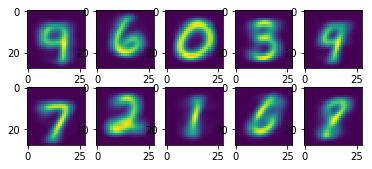

Iteration terminated.


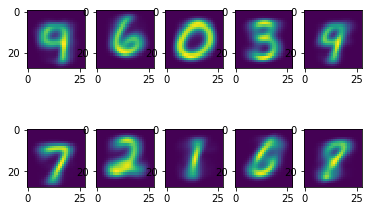

Wall time: 3min 17s


In [154]:
%%time
k = 10
km = kmeans(k, diffC_lim=50)
km.train(X)

for i in range(k):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.reshape(km.centers[i, :], (28, 28)))
plt.show()

In [ ]:
%%time
k = 20
km = kmeans(k, diffC_lim=50)
km.train(X)

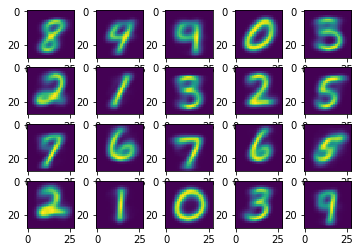

In [156]:
for i in range(k):
    plt.subplot(4, 5, i+1)
    plt.imshow(np.reshape(km.centers[i, :], (28, 28)))
plt.show()